In [1]:
#in unsupervised learning, only inputs are given, the machine then groups the data according to it
#there are not much datasets for unsupervised learning, we just give the inputs from the existing datasets
#no analysis and no accuracy prediction is possible


# Package import

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [35]:
data = pd.read_csv(r"C:\Users\CTTC\Downloads\Datasets\iris.data",header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
data.columns = ['SL','SW','PL','PW','flower']   
data

,SL,SW,PL,PW,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
data.isnull().sum()

SL        0
SW        0
PL        0
PW        0
flower    0
dtype: int64

In [38]:
data.dtypes

SL        float64
SW        float64
PL        float64
PW        float64
flower     object
dtype: object

In [39]:
for i in data.columns:
    print(i,'\n',data[i].unique(),'\n')

SL 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9] 

SW 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6] 

PL 
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2] 

PW 
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3] 

flower 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



# Data Analysis

          SL        SW        PL        PW
SL  1.000000 -0.109369  0.871754  0.817954
SW -0.109369  1.000000 -0.420516 -0.356544
PL  0.871754 -0.420516  1.000000  0.962757
PW  0.817954 -0.356544  0.962757  1.000000


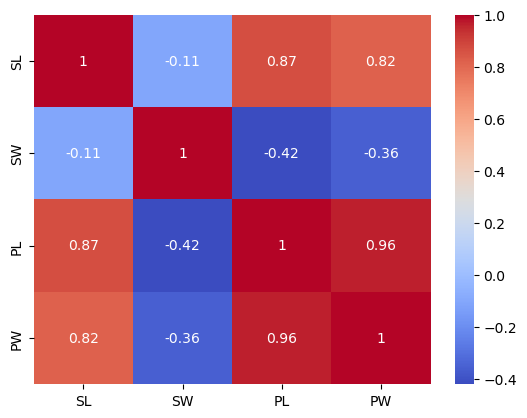

In [40]:
#heatmap
cor = data.corr()
print(cor)
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

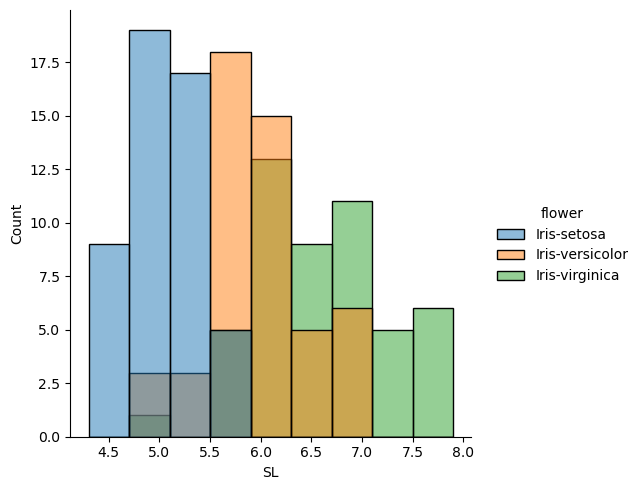

In [41]:
sns.displot(x=data.SL,hue=data.flower)
plt.show()

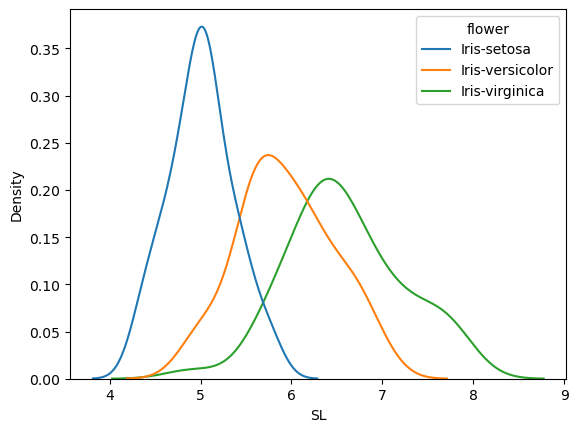

In [42]:
sns.kdeplot(x=data.SL,hue=data.flower)
plt.show()

# Label Encoding

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['flower'] = le.fit_transform(data['flower'])           #encoding
data['flower'].unique()

array([0, 1, 2])

In [44]:
data.flower = le.inverse_transform(data.flower)    #decoding

In [45]:
data.head()

,SL,SW,PL,PW,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# ip/op creation

In [46]:
ip=data.drop('flower',axis=1)


# K-Means Clustering

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ip = sc.fit_transform(ip) 

In [48]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=2)
km.fit(ip)

#'n_clusters' defines the initial amount of clusters to be created for the model
#the model updatews the clusters based on the mean of each point in the clusters
#the cluster centers are not updated by the model afterwards
#the model just fits the data into the similar features based categories

KMeans(n_clusters=2)

In [49]:
k = km.predict(ip)
print(k)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


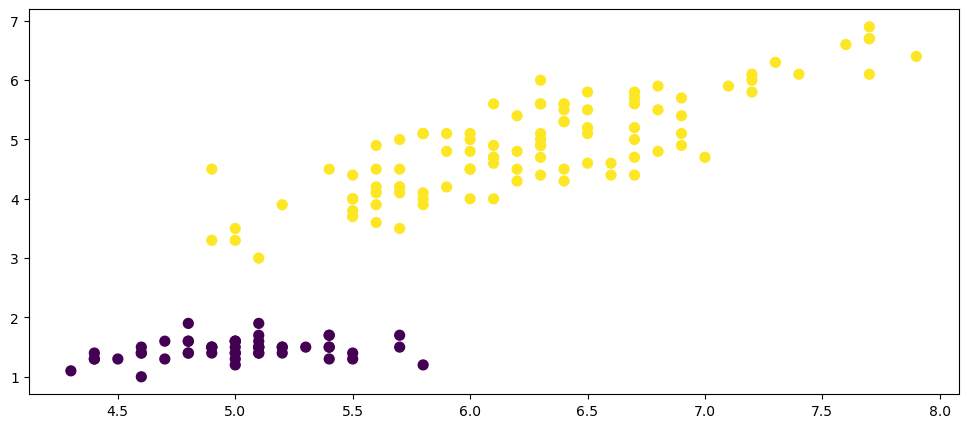

In [50]:
plt.figure(figsize=(12,5))
plt.scatter(data.SL,data.PL,c=k,s=50,cmap='viridis')
plt.show()


#'c' is the array-like or list of colors or color, that differentiates the categories based on  colors
#'data.SL' is for x, 'data.PL' for y
#'s' is for marker size
#'cmap' declares the color palette

In [19]:
data['Predict']=k
data

,SL,SW,PL,PW,flower,Predict
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [20]:
centroids = km.cluster_centers_
print(centroids)

#'cluster_centers_' gives the centers for each centers of the cluster

[[ 1.13597027  0.09659843  0.996271    1.01717187]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


In [21]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
data = pd.DataFrame(x,y)

In [22]:
data

,0,1
1,0.836857,2.136359
3,-1.413658,7.409623
0,1.155213,5.099619
3,-1.018616,7.814915
1,1.271351,1.892542
...,...,...
1,1.973698,1.579798
1,2.518342,1.391766
0,0.438990,4.535929
3,0.369479,7.791105


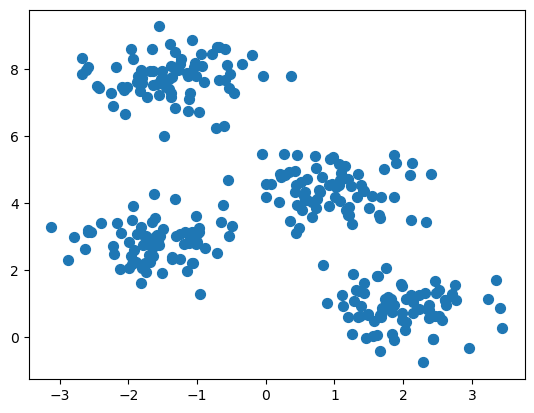

In [23]:
plt.scatter(x[:,0],x[:,1],s=50)
plt.show()

In [24]:
from sklearn import cluster

km1 = cluster.KMeans(n_clusters=4)
km1.fit(x)

KMeans(n_clusters=4)

In [25]:
yp1 = km1.predict(x)
data['predict']=yp1

In [26]:
centroid = km1.cluster_centers_
print(centroid)

[[-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


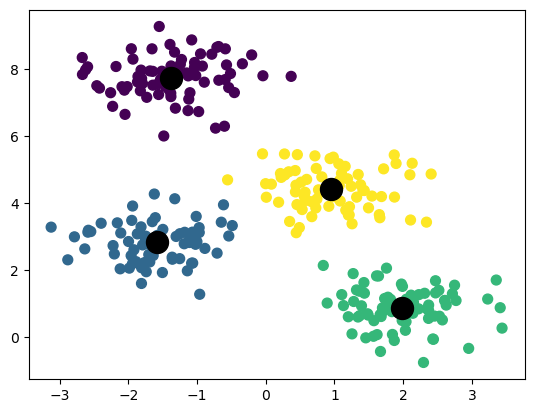

In [27]:
plt.scatter(x[:,0],x[:,1],c=yp1,s=50,cmap='viridis')
plt.scatter(centroid[:,0],centroid[:,1],s=250,c='black')
plt.show()


In [28]:
def ClusterIndicesNumpy(clustNum,Label_array):
    return np.where(Label_array==clustNum)

ClusterIndicesNumpy(2,km1.labels_)

(array([  0,   4,   5,  14,  17,  20,  21,  26,  39,  49,  51,  53,  54,
         59,  67,  78,  80,  82,  83,  86,  91,  96,  97, 101, 103, 105,
        106, 112, 114, 117, 118, 121, 123, 124, 125, 126, 128, 133, 154,
        158, 163, 168, 172, 176, 177, 180, 188, 202, 217, 218, 221, 222,
        224, 233, 236, 240, 242, 252, 257, 258, 263, 269, 270, 274, 275,
        276, 280, 281, 283, 284, 285, 290, 291, 295, 296], dtype=int64),)

In [29]:
x[ClusterIndicesNumpy(2,km1.labels_)]

array([[ 0.83685684,  2.13635938],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [ 1.45513831, -0.029199  ],
       [ 2.56936589,  0.5070483 ],
       [ 2.71506328,  1.2908219 ],
       [ 1.77710994,  1.18655254],
       [ 1.6974791 ,  0.86612328],
       [ 1.66382237,  0.66309163],
       [ 1.98894313,  1.50976729],
       [ 2.45509737,  0.62123179],
       [ 1.69687788,  0.75491062],
       [ 1.75644805,  2.05538289],
       [ 1.39263752,  0.92896271],
       [ 2.36960214,  0.95071691],
       [ 2.14043942,  0.70606661],
       [ 1.25471244,  0.08963316],
       [ 1.27955338,  1.05789418],
       [ 1.72955064,  1.14729369],
       [ 2.36923352,  0.79473586],
       [ 1.78194802,  0.90815116],
       [ 1.36155806,  1.36638252],
       [ 2.60137487,  1.08799459],
       [ 1.66909648, -0.43637823],
       [ 2.36790645,  0.55219088],
       [ 2.22707373,  1.26296996],
       [ 2.43934644, -0.07250997],
       [ 1.57322172,  0.48393379],
       [ 1.83375842,